# 1. Objective
---
**Perform Exploratory Data Analysis on Haberman's Cancer Survival Dataset to classify/predict a patient survival who had undergone surgery for breast cancer.**

---

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings 
warnings.filterwarnings("ignore") 

haberman = pd.read_csv("haberman.csv")
haberman.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [3]:
print(haberman.shape)

(306, 4)


Number of Data points = 306 and number of features = 4

In [4]:
print(haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


The features are Age, Year, Nodes, Status
* **Age - Age of patient at time of operation**
* **Year - Patient's year of operation**
* **Nodes - Number of detected positive auxiliary nodes.**
* **Status - Survival status**

In [5]:
haberman["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

Number of classes is two(1 and 2) and number of data points per class is as displayed above.
* **1 - The patient survived for 5 years or longer**
* **2 - The patient died within 5 years**

In [6]:
#Statistical summary
haberman.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


# (1.1) Bivariate Analysis

## (1.1.1) 1-D Scatter Plot

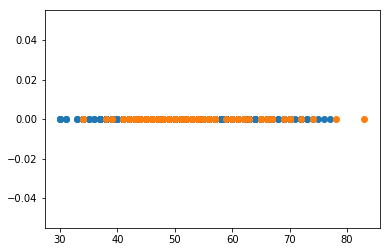

In [7]:
haberman_1 = haberman.loc[haberman['status']==1]
haberman_2 = haberman.loc[haberman['status']==2]

plt.plot(haberman_1["age"], np.zeros_like(haberman_1["age"]), 'o')
plt.plot(haberman_2["age"], np.zeros_like(haberman_2["age"]), 'o')
plt.show()

### Observation
* Although there is considerable overlap, we can see that many people of the age group 41-71 died within 5 years post operation.

## (1.1.2) 2-D Scatter Plot

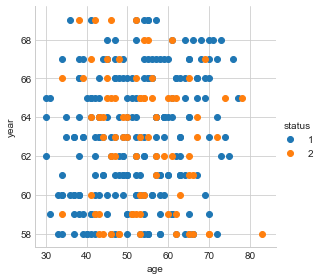

In [8]:
sns.set_style("whitegrid")
sns.FacetGrid(haberman, hue="status", size=4)\
   .map(plt.scatter, "age", "year")\
   .add_legend()
plt.show()

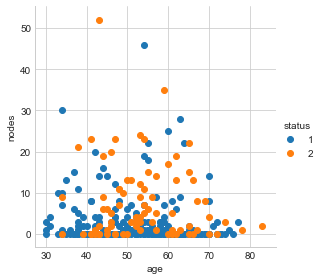

In [9]:
sns.set_style("whitegrid")
sns.FacetGrid(haberman, hue="status", size=4)\
   .map(plt.scatter, "age", "nodes")\
   .add_legend()
plt.show()

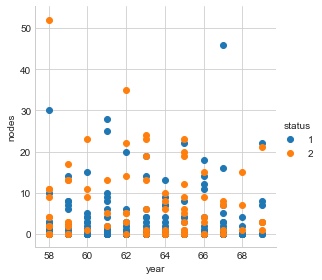

In [10]:
sns.set_style("whitegrid")
sns.FacetGrid(haberman, hue="status", size=4)\
   .map(plt.scatter, "year", "nodes")\
   .add_legend()
plt.show()

### Observations
* Not able to obtain any useful information for classifying with combination of features using 2-D scatter plot.
* Points are scattered all over and overlapping.

## (1.1.3) Pair Plot

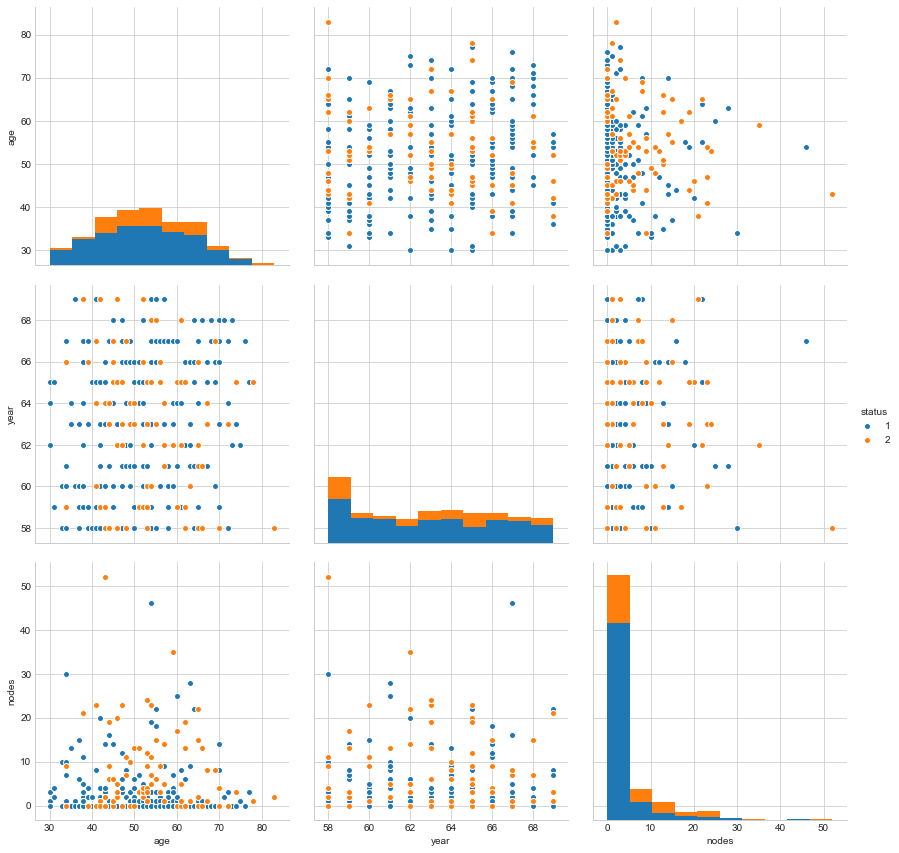

In [11]:
plt.close()
sns.set_style("whitegrid")
sns.pairplot(haberman, hue="status",vars=["age","year","nodes"], size=4)
plt.show()

### Observation
* Pair plot also does not help in identifying the most useful combination of features for classifying status as there is considerable amount of overlapping.

# (1.2) Univariate Analysis

## (1.2.1) Histogram and PDF

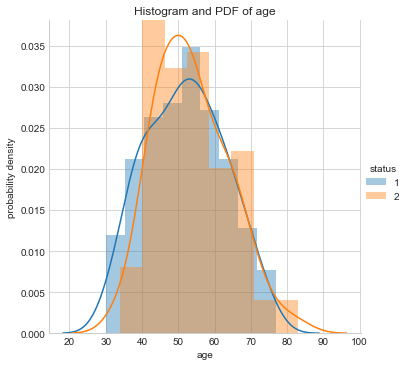

In [12]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.ylabel('probability density')
plt.title('Histogram and PDF of age')
plt.show();

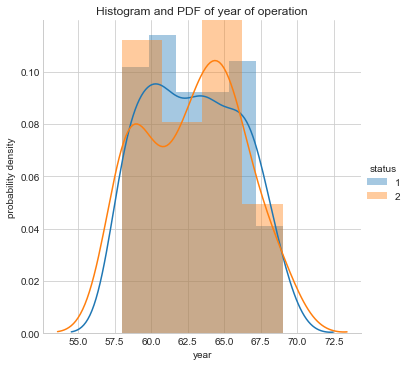

In [13]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.ylabel('probability density')
plt.title('Histogram and PDF of year of operation')
plt.show();

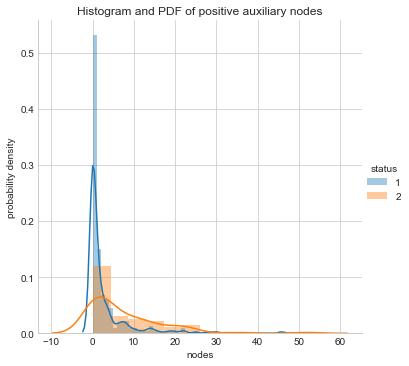

In [14]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.ylabel('probability density')
plt.title('Histogram and PDF of positive auxiliary nodes')
plt.show();

### Observations
* Nodes is better for classifying
* The count of patients who survived for 5 years or more after operation is higher for positive auxiliary nodes in the range 0 to 3

## (1.2.2) CDF

### PDF and CDF for age###

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


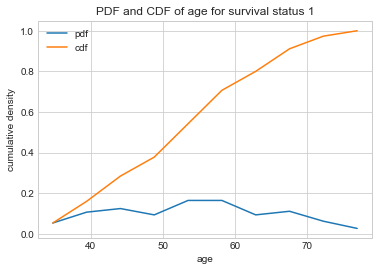

In [15]:
# 1 - The patient survived for 5 years or longer
counts, bin_edges = np.histogram(haberman_1['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.title('PDF and CDF of age for survival status 1')
plt.xlabel("age")
plt.ylabel('cumulative density')
plt.plot(bin_edges[1:],pdf,label='pdf')
plt.plot(bin_edges[1:],cdf,label='cdf')
plt.legend()


[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


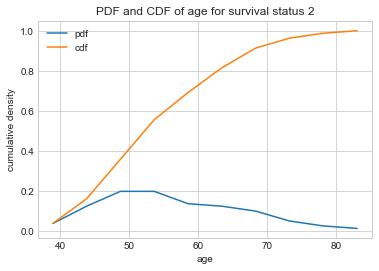

In [16]:
# 2 - The patient died within 5 years
counts, bin_edges = np.histogram(haberman_2['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.title('PDF and CDF of age for survival status 2')
plt.xlabel('age')
plt.ylabel('cumulative density')
plt.plot(bin_edges[1:],pdf,label='pdf')
plt.plot(bin_edges[1:],cdf,label='cdf')
plt.legend()

### PDF and CDF for operation year ###

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


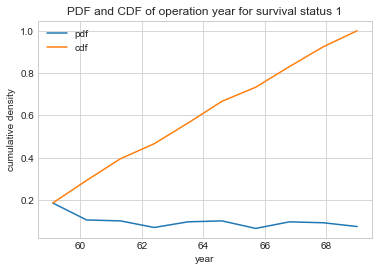

In [17]:
# 1 - The patient survived for 5 years or longer
counts, bin_edges = np.histogram(haberman_1['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.title('PDF and CDF of operation year for survival status 1')
plt.xlabel('year')
plt.ylabel('cumulative density')
plt.plot(bin_edges[1:],pdf,label='pdf')
plt.plot(bin_edges[1:],cdf,label='cdf')
plt.legend()

[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


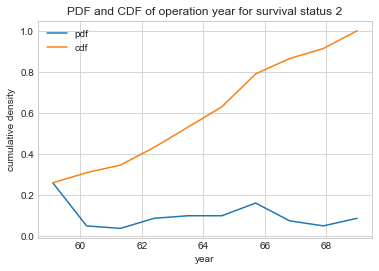

In [18]:
# 2 - The patient died within 5 years
counts, bin_edges = np.histogram(haberman_2['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.title('PDF and CDF of operation year for survival status 2')
plt.xlabel('year')
plt.ylabel('cumulative density')
plt.plot(bin_edges[1:],pdf,label='pdf')
plt.plot(bin_edges[1:],cdf,label='cdf')
plt.legend()

### PDF and CDF for positive auxiliary nodes ###

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


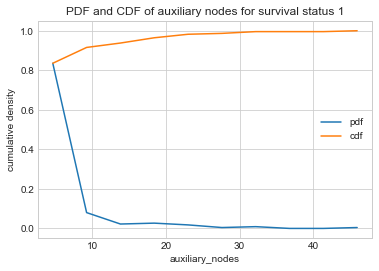

In [19]:
# 1 - The patient survived for 5 years or longer
counts, bin_edges = np.histogram(haberman_1['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.title('PDF and CDF of auxiliary nodes for survival status 1')
plt.xlabel('auxiliary_nodes')
plt.ylabel('cumulative density')
plt.plot(bin_edges[1:],pdf,label='pdf')
plt.plot(bin_edges[1:],cdf,label='cdf')
plt.legend()

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


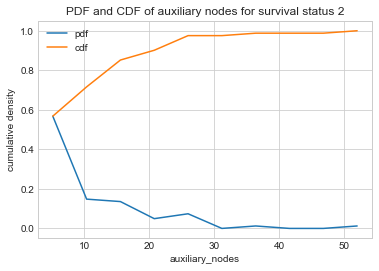

In [20]:
# 2 - The patient died within 5 years
counts, bin_edges = np.histogram(haberman_2['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.title('PDF and CDF of auxiliary nodes for survival status 2')
plt.xlabel('auxiliary_nodes')
plt.ylabel('cumulative density')
plt.plot(bin_edges[1:],pdf,label='pdf')
plt.plot(bin_edges[1:],cdf,label='cdf')
plt.legend()

### Observations
* 92% of the people who survived for 5 or more years had positive auxiliary nodes less than or equal to 10
* 70% of the people who did not survive for 5 years had positive auxiliary nodes less than or equal to 10

## (1.2.3) Box plot

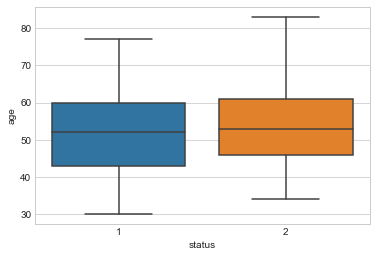

In [21]:
sns.boxplot(x='status',y='age', data=haberman)
plt.show()

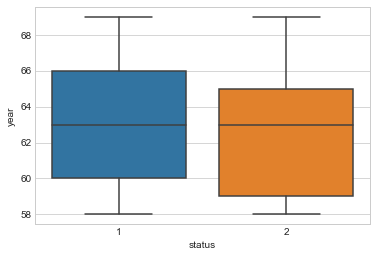

In [22]:
sns.boxplot(x='status',y='year', data=haberman)
plt.show()

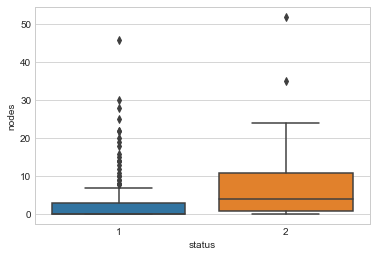

In [23]:
sns.boxplot(x='status',y='nodes', data=haberman)
plt.show()

### Observations
* The chances of survival are more if the number of detected auxiliary nodes are less than or equal to 10

## (1.2.4) Violin plot

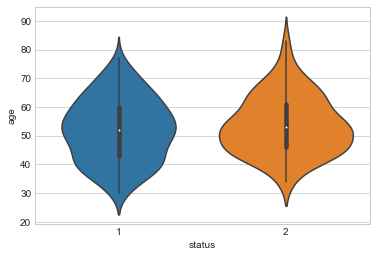

In [24]:
sns.violinplot(x="status", y="age", data=haberman, size=8)
plt.show()

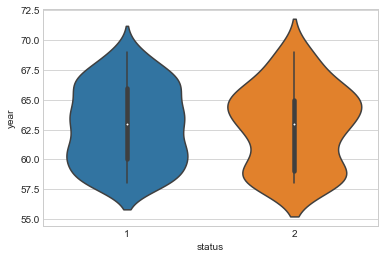

In [25]:
sns.violinplot(x="status", y="year", data=haberman, size=8)
plt.show()

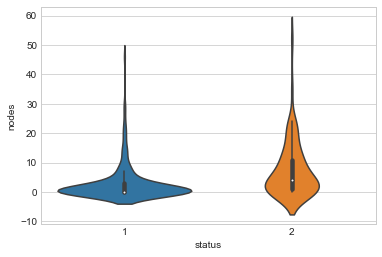

In [26]:
sns.violinplot(x="status", y="nodes", data=haberman, size=8)
plt.show()

### Observations
Similar to Box Plot

# (1.3) Conclusion
It is very hard to classify survival status from the dataset as there is considerable amount of overlapping. Still we can derive some observations like:
* **Age has no effect on survival status.**
* **Number of detected positive auxiliary nodes can give better classification/prediction of survival status compared to the other two features. But it cannot be relied on for building a model using if..else for classification.**